# Fitting a linear model predicting rings using only the variables: Sex (as a factor) and Whole Weight 

## Preparing the Data


In [154]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('../data/processed/abalone.csv')



In [155]:
#Converting Sex to Categorical Variable
data['Sex'] = data['Sex'].map({0 : 'M', 1 : 'F', 2 : 'I'})


data['Sex'] = data['Sex'].astype('category')
print(data['Sex'].unique())

['M', 'F', 'I']
Categories (3, object): ['F', 'I', 'M']


## Fitting the Linear Model

In [156]:
# Fitting the Linear Model

import statsmodels.formula.api as smf
model_interact = smf.ols(formula='Rings ~ C(Sex) * Q("Whole weight")', data=data).fit()

print(model_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     452.8
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:18:05   Log-Likelihood:                -9895.5
No. Observations:                4172   AIC:                         1.980e+04
Df Residuals:                    4166   BIC:                         1.984e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Comments

### Key Statistics
- R-Squared is 0.352, meaning about 35.2% of the variation in the Rings is explained by the model
- F-Static value is 452.8, with p < 0.001, indicating the significance of the whole model, statistically
- Kurtosis being 6.92, and Skew being 1.62, shows that the residuals may not be perfectly normal, but with this large sample size, it isn't too critical

### Coefficients
Baseline (`Females`)
- `Intercept` = `9.1216`
- `Slope` = `1.921`

`Infants` (I)
- `Intercept` = Baseline + Baseline Shift (C(Sex)[T.I]) = 9.1216 - 3.8558 = `5.2658`
- `Slope` = Baseline Slope + (C(Sex)[T.I]:Whole weight = 4.1720) = 1.9201 + 4.1720 = `6.0921`
    Infants gain about 6.09 rings for each 1-unit increase in whole weight, significantly higher than females

`Males` (I)
- `Intercept` = Baseline + Baseline Shift (C(Sex)[T.M]) = 9.1216 - 0.7999 = `8.3217`
- `Slope` = Baseline Slope + (C(Sex)[T.M]:Whole weight = 0.4866) = 1.9201 + 0.4866 = `2.4067`
    Infants gain about 6.09 rings for each 1-unit increase in whole weight, significantly higher than females


### Significance
- p-values of all the terms (main effects and interactions) is less than 0.05 (p < 0.05), meaning that they are stastically significant

### Interpretation
- As we can see, sex matters. This is because both Intercept Rings and Slopes differ significantly.
- Whole Weight is a strong predictor. This is because Higher whole weight generally correlates with more rings, but the efect   size varies accross sex categories.
- There is rapid growth or increase in the rings for Infants. This is because there is much steeper slope for Infants, indicating a rapid increase in rings as weight increases


### Conclusion
Overall, this regression model explains about 35% of the variation in Rings, indicating that both Sex and Whole weight, along with their interaction, does play a significant role in predicting abalone age. Infants begin with a lower baseline number of Rings but show a steep increase in Rings as Whole weight grows, while Males have a moderate slope and Females have the lowest slope but the highest baseline. All coefficients are statistically significant, showing the importance of including Sex and its interaction with Whole weight when modeling Rings.

# Fitting a linear model with all the original variables, (without transforming predictors and without interactions)

In [157]:
import statsmodels.formula.api as smf

#Our Predictors are Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight and Shell weight
# Fit the full model using all original predictors
model_full = smf.ols(
    formula='Rings ~ C(Sex) + Length + Diameter + Height + Q("Whole weight") + Q("Shucked weight") + Q("Viscera weight") + Q("Shell weight")',
    data=data
).fit()

# Display the model summary
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     549.8
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:18:05   Log-Likelihood:                -9166.7
No. Observations:                4172   AIC:                         1.835e+04
Df Residuals:                    4162   BIC:                         1.842e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.5967    

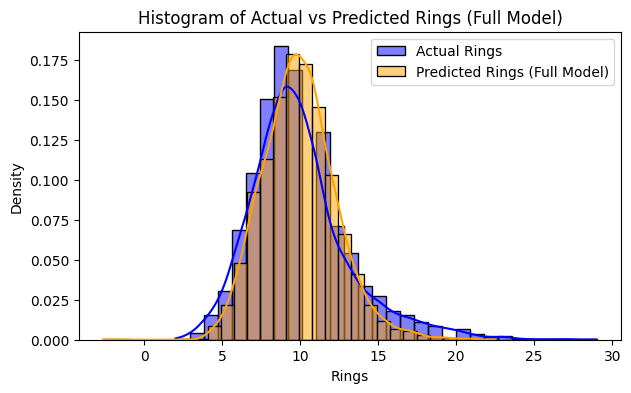

In [158]:
# Visualizing the model in Histplot
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_full = model_full.predict(data)

# Plot histogram of actual vs predicted
plt.figure(figsize=(7,4))
sns.histplot(data['Rings'], kde=True, color='blue', label='Actual Rings', stat='density', bins=30)
sns.histplot(y_pred_full, kde=True, color='orange', label='Predicted Rings (Full Model)', stat='density', bins=30)
plt.title('Histogram of Actual vs Predicted Rings (Full Model)')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()
plt.show()

### Key Statistics
- `R-Squared` is 0.543, meaning about 54.3% of the variation in the Rings is explained by the model, and `Ajusted R-squared` value is 0.542, slightly lower due to multiple predictors.
- `Kurtosis` being 6.03, and `Skew` being 1.192, shows that the residuals are not be perfectly normal, however with this large sample size isn't too critical.

### Coefficient Observations
- `Length` also has negative coefficient, likely due to its multicollinearity with `Diameter` (found earlier in th analysis).
- C(Sex)[T.M] coefficient is very low, meaning that `Males` have only 0.0554 rings more than `Females`.
- We can see that P value for `Length` and `C(Sex)[T.M]` is really high (p > 0.05), and `t` is very low (close to 0)
- There are negative coefficients for `Shucked Weight` and `Viscera Weight` but positive coefficient for `Whole Weight`, this is likely due to multicollinearity (found earlier on in the analysis)
- Coefficients for `C(Sex)[T.M]` and `C(Sex)[T.I]` are low (0.0554 and -0.7907).

### Interpretation

This model explaining around 54% of the variation in abalone age. Key predictors such as `Height`, `Diameter`, and `Whole Weight` showed strong  relationships with age, aligning with the findings from earlier exploration. However, not all the results aligned with what we expected. Some predictors like `Length`, `Shucked Weight`, and `Viscera Weight` had **negative or unexpected coefficients**. This is likely due to **multicollinearity**, where predictors are highly correlated with each other, which makes it **difficult for the model to accurately isolate their individual effects**. We also found that males only had 0.554 rings more than the `Females`, which is not statistically significant. This is a much different observation compared to the earlier model (*Fitting Model using `Sex` and `Whole Weight`*), where we found significant difference in slopes and intercepts. This means that when other physical measurements are included (e.g Length, Diameter, etc), **sex of the abalone adds little additional predictive value**, and `Males` and `Females` **would have similar predicted rings**

### Visual Interpretation

The histogram overlay of actual vs predicted rings shows that the predicted value from this model is reasonably centered around the actual values, especially in the 8-12 rings range. However, the predicted distribution is slightly more narrower from both sides and has a higher peak. This suggests that the model may underestimate the variability in age. The model also seems to miss some of the extreme values on the higher end.

### Conclusion
The model provides a **moderate fit to the data**. It captures over half of the variability in abalone age, which is decent for a simple linear model using untransformed predictors. However, the presence of **multicollinearity**, and some **unexpected coefficient signs** suggest that the model could be improved with further refinement. While it shows some useful general trends, it may not be highly reliable for detailed interpretation or precise predictions. Visually, the histogram overlay shows a** narrower spread and higher peak** in the predicted values compared to the actual distribution. This indicates an **underestimation of variability**, with the model **failing to capture some of the extreme values**, especially the higher values.

# Fitting the model after PCA

In [159]:
%pip install scikit-learn
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Transforming the Predictors

In [161]:
# Choosing the predictors and target variable
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
X = data[features]
y = data['Rings'] # Target variable

In [162]:
# Standardizing the features to have mean=0 and std = 1, as PCA is scale-sensitive
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Applying PCA and choosing PCs

In [163]:
pca = PCA()

X_pca = pca.fit_transform(X_scaled)

In [164]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance = np.cumsum(pca.explained_variance_ratio_)

for i in range(1, len(explained_variance)+1):
    print(f"Explained variance by the first {i} components: {explained_variance[i-1]*100:.2f}%")

Explained variance by the first 1 components: 92.45%
Explained variance by the first 2 components: 95.50%
Explained variance by the first 3 components: 97.49%
Explained variance by the first 4 components: 98.81%
Explained variance by the first 5 components: 99.72%
Explained variance by the first 6 components: 99.91%
Explained variance by the first 7 components: 100.00%


**Comment**

We can see that based on the explained variance, we select the 1st **2 PCs** for our modelling, as they capture **over 95% of variance** in data, which is more than enough for dimensionality reduction.

## Fitting Linear Regression Model with 2 PCs

In [165]:
import statsmodels.api as sm

# PCA with 2 components
X_pca_reduced = X_pca[:, :2]  
X_with_const = sm.add_constant(X_pca_reduced)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:18:07   Log-Likelihood:                -9705.1
No. Observations:                4172   AIC:                         1.942e+04
Df Residuals:                    4169   BIC:                         1.944e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9377      0.038    258.978      0.0

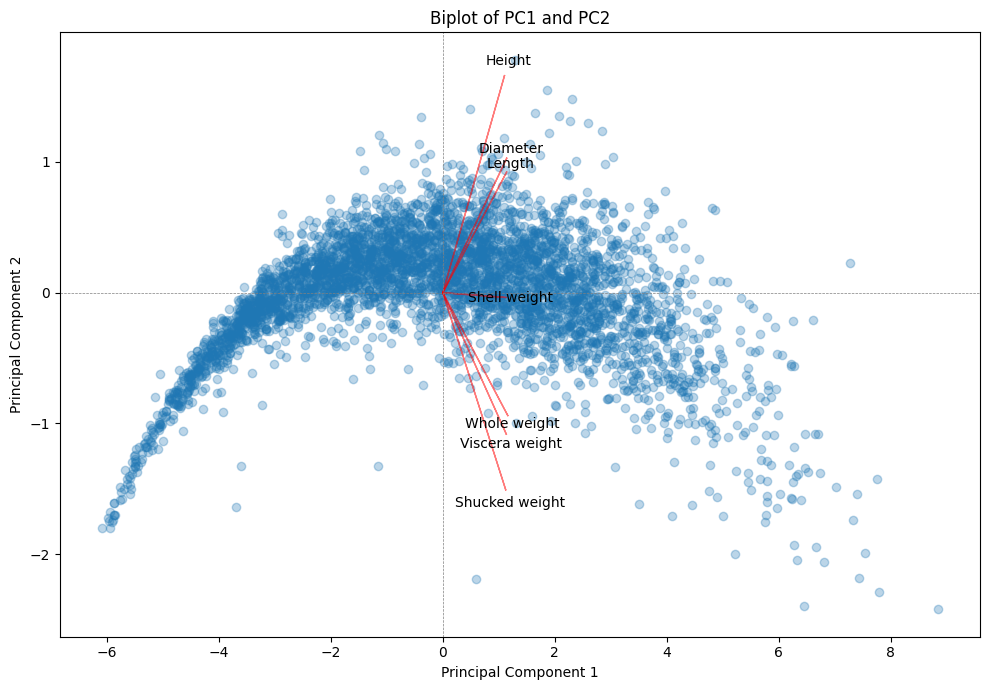

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_scaled)  # Make sure X_scaled is your standardized data

# Biplot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], alpha=0.3)

# Add arrows (vectors of loadings)
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, 
              pca.components_[0, i]*3, 
              pca.components_[1, i]*3, 
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*3.2, 
             pca.components_[1, i]*3.2, 
             feature, color='black', ha='center', va='center')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Biplot of PC1 and PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


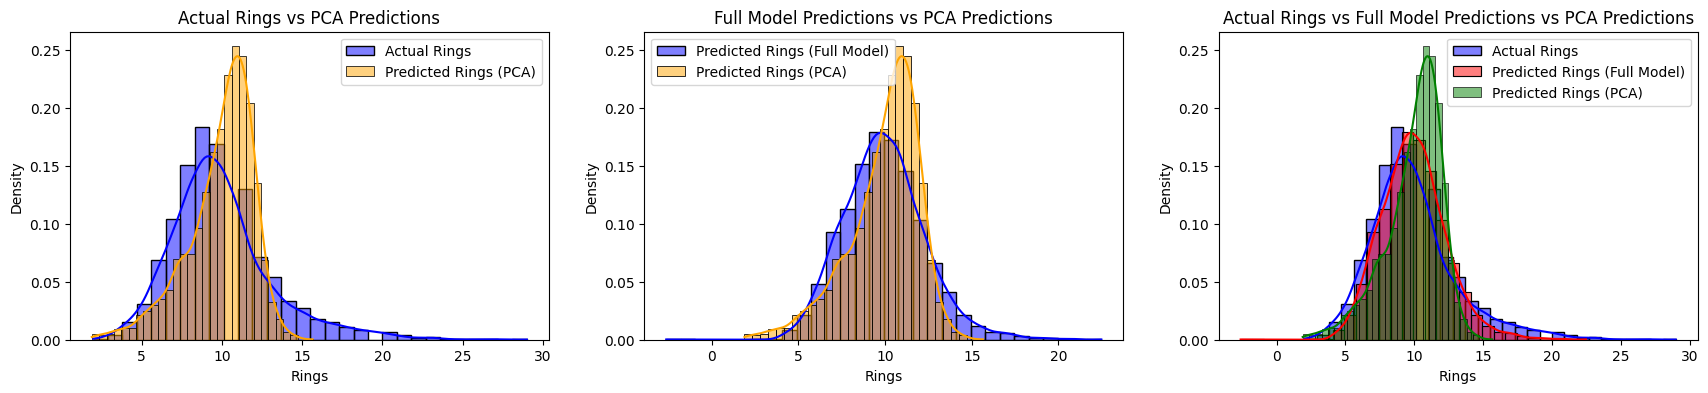

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

y = data['Rings']
y_pred_pca = model.predict(X_with_const)
plt.figure(figsize=(21, 4))

# Histogram of actual vs predicted rings from PCA model
plt.subplot(1, 3, 1)
sns.histplot(y, bins=30, color='blue', label='Actual Rings', kde=True, stat='density', alpha=0.5)
sns.histplot(y_pred_pca, bins=30, color='orange', label='Predicted Rings (PCA)', kde=True, stat='density', alpha=0.5)
plt.title('Actual Rings vs PCA Predictions')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()

#Histogram of predicted rings from both models
plt.subplot(1, 3, 2)
sns.histplot(y_pred_full, bins=30, color='blue', label='Predicted Rings (Full Model)', kde=True, stat='density', alpha=0.5)
sns.histplot(y_pred_pca, bins=30, color='orange', label='Predicted Rings (PCA)', kde=True, stat='density', alpha=0.5)
plt.title('Full Model Predictions vs PCA Predictions')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()

# Histogram of actual vs predicted rings from both models
plt.subplot(1, 3, 3)
sns.histplot(y, bins=30, color='blue', label='Actual Rings', kde=True, stat='density', alpha=0.5)
sns.histplot(y_pred_full, bins=30, color='red', label='Predicted Rings (Full Model)', kde=True, stat='density', alpha=0.5)
sns.histplot(y_pred_pca, bins=30, color='green', label='Predicted Rings (PCA)', kde=True, stat='density', alpha=0.5)
plt.title('Actual Rings vs Full Model Predictions vs PCA Predictions')
plt.xlabel('Rings')
plt.ylabel('Density')
plt.legend()



### Key Statistics
- **R-Squared Value** is **0.409**, meaning that the model explains **40.9%** of variations in Rings.
- **Kurtosis** being **6.715**, and **skew** being **1.587** shows non-normality in residuals, however they are acceptable for a large dataset like Abalone.

### Coefficient Observations
- **PC1 (x1)** and **PC2 (x2)** are both **highly significant** (p < 0.0001) with **strong t-values**, suggesting the components meaningfully contribute to predicting Rings.
- **PC2** has a **higher coefficient (2.0337)** compared to **PC1 (0.7205)**, indicating it may carry more specific age-related information after decorrelation.

### Interpretation
- This PCA model, with **2 PCs**, explains **40.9%** of the variation in the Rings, which is lower than the model with all predictor variables (**54.3%**).
- The model avoids the multicollinearity problem and simplifies the feature space to **two orthogonal axes**. While it performs decently, we lose the **direct connection to original features**, making it difficult to explain what **PC1** and **PC2** represent.

### Visual Interpretation
- The histogram comparing **actual vs predicted values** (for PCA model) shows the predicted distribution is **centered reasonably well**, but is **narrower and more peaked** than the actual distribution.
- There is **right skewness** for predicted values and **left skewness** for actual values, suggesting the model **underestimates variability** and **misses some extremes**.
- Comparing **Predicted Values of the Full model** and **PCA model** shows that **PCA predictions are more concentrated** with a **higher peak (at 11-12 Rings)** and **less spread** than full model predictions.
- Overlaying Actual, Full Model, and PCA predictions highlights how **PCA predictions are narrower and higher**, while **Full Model Predictions align better with actual values**.

### PCA Prediction Model vs Original Prediction Model 
- The **PCA-based model** performs **moderately well** with a **40.9% R-squared**, but is **less accurate** than the **Full Model (54.3% R-squared)**.
- **PCA reduces multicollinearity** by creating **uncorrelated components**, but this also **reduces interpretability** and can lose key relationships.
- Visually, **PCA predictions** are **narrower and higher**, while **Full Model predictions better overlay Actual Rings** and reflect **more variability**.

### Conclusion
The PCA regression model using **2 principal components** explains about **40.9%** of the variation in abalone age, lower than the **54.3%** explained by the full model using original predictors. While PCA helps **reduce multicollinearity** and **simplifies** the data, it also leads to a **loss in predictive accuracy** and **interpretability**. Visualizations show the PCA model **misses extreme values** and **underestimates variability**.  
**Overall, the full model fits the data better and is more accurate for prediction**, while the PCA model offers a **simpler and more stable** alternative with **slightly reduced performance**.


Predicted Rings: 9.95
